In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
historical_data = pd.read_csv(r"C:\Users\SAURABH\Downloads\historical_data.csv")
sentiment_data = pd.read_csv(r"C:\Users\SAURABH\Downloads\fear_greed_index.csv")

# Display basic information about the datasets
historical_data.info()
sentiment_data.info()

# Display column names
print("Historical Data Columns:", historical_data.columns)
print("Sentiment Data Columns:", sentiment_data.columns)

In [3]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [4]:
# Get float columns
float_cols = historical_data.select_dtypes(include=['float64']).columns

# Round float columns to 2 decimal places
historical_data[float_cols] = historical_data[float_cols].round(2)

# Set pandas display option to avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [4]:
historical_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,986.87,7872.16,BUY,02-12-2024 22:50,0.00,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.35,895000000000000.00,1730000000000.00
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.00,127.68,BUY,02-12-2024 22:50,986.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.01,443000000000000.00,1730000000000.00
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,144.09,1150.63,BUY,02-12-2024 22:50,1002.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,660000000000000.00,1730000000000.00
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,142.98,1142.04,BUY,02-12-2024 22:50,1146.56,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,1080000000000000.00,1730000000000.00
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,8.73,69.75,BUY,02-12-2024 22:50,1289.49,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.00,1050000000000000.00,1730000000000.00


In [5]:
# Clear any missing values from both datasets
historical_data = historical_data.dropna()
sentiment_data = sentiment_data.dropna()

In [6]:
# Convert 'date' columns to date only
historical_data['date'] = pd.to_datetime(historical_data['Timestamp IST'], dayfirst=True).dt.date
sentiment_data['date'] = pd.to_datetime(sentiment_data['date']).dt.date

In [7]:
# Merge datasets on 'date' column
merged_data = pd.merge(historical_data, sentiment_data, on='date', how='left')

In [8]:
merged_data.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,986.87,7872.16,BUY,02-12-2024 22:50,0.00,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.35,895000000000000.00,1730000000000.00,2024-12-02,1733117400.00,80.00,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.98,16.00,127.68,BUY,02-12-2024 22:50,986.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.01,443000000000000.00,1730000000000.00,2024-12-02,1733117400.00,80.00,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,144.09,1150.63,BUY,02-12-2024 22:50,1002.52,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,660000000000000.00,1730000000000.00,2024-12-02,1733117400.00,80.00,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,142.98,1142.04,BUY,02-12-2024 22:50,1146.56,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.05,1080000000000000.00,1730000000000.00,2024-12-02,1733117400.00,80.00,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.99,8.73,69.75,BUY,02-12-2024 22:50,1289.49,Buy,0.00,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.00,1050000000000000.00,1730000000000.00,2024-12-02,1733117400.00,80.00,Extreme Greed


In [24]:
# Total Closed PnL, Average Closed PnL, Total Size USD, Proportion of BUY Trades per Sentiment Type
total_pnl_per_sentiment = merged_data.groupby('classification').agg({
    'Closed PnL': ['sum', 'mean'],
    'Size USD': 'sum',
    'Side': lambda x: (x == 'BUY').sum()/len(x)
    }).reset_index()

total_pnl_per_sentiment.columns = ['Sentiment', 'Total Closed PnL', 'Average Closed PnL', 'Total Size USD', 'Proportion of BUY Trades']

print("Total PnL per Sentiment Type:\n", total_pnl_per_sentiment)

Total PnL per Sentiment Type:
        Sentiment  Total Closed PnL  Average Closed PnL  Total Size USD  \
0   Extreme Fear         739109.83               34.54    114484261.44   
1  Extreme Greed        2715171.47               67.89    124465164.57   
2           Fear        3357155.11               54.29    483324789.79   
3          Greed        2150130.56               42.74    288582494.72   
4        Neutral        1292921.70               34.31    180242063.08   

   Proportion of BUY Trades  
0                      0.51  
1                      0.45  
2                      0.49  
3                      0.49  
4                      0.50  


In [14]:
# Win Rate by Sentiment Type
win_rate = merged_data.groupby('classification').apply(lambda x: (x['Closed PnL'] > 0).sum() / len(x)).reset_index(name='Win Rate')
print("Win Rate by Sentiment Type:\n", win_rate)

Win Rate by Sentiment Type:
   classification  Win Rate
0   Extreme Fear      0.37
1  Extreme Greed      0.46
2           Fear      0.42
3          Greed      0.38
4        Neutral      0.40


In [16]:
# Average Trade Size per Sentiment Type
avg_trade_size = merged_data.groupby('classification')['Size USD'].mean().reset_index(name='Average Trade Size USD')
print("Average Trade Size per Sentiment Type:\n", avg_trade_size)

Average Trade Size per Sentiment Type:
   classification  Average Trade Size USD
0   Extreme Fear                 5349.73
1  Extreme Greed                 3112.25
2           Fear                 7816.11
3          Greed                 5736.88
4        Neutral                 4782.73


In [ ]:
# liquidation / auto-deleveraging count
# Get which sentiment types cause forced exits
liquidations = merged_data[
    merged_data['Direction'].str.contains('Liquidated|Auto-Deleveraging', na=False)
].groupby('classification').size().reset_index(name='Liquidation/AD Count')

print("Liquidation/Auto-Deleveraging Count by Sentiment Type:\n", liquidations)

Liquidation/Auto-Deleveraging Count by Sentiment Type:
   classification  Liquidation/AD Count
0          Greed                     9


In [21]:
# numerical correlation between sentiment value and PnL
correlation = merged_data['value'].corr(merged_data['Closed PnL'])
print(f"Correlation between Sentiment Value and Closed PnL: {correlation:.2f}")

Correlation between Sentiment Value and Closed PnL: 0.01


In [22]:

# Profitability Distribution by Sentiment Type
# Aggregate Closed PnL by sentiment:
# Total profit/loss per sentiment type.
# Average profit per trade per sentiment.
# Insight: You might find traders perform better in certain market moods (e.g., Fear vs Greed).
profitability_stats = merged_data.groupby('classification')['Closed PnL'].agg(['sum', 'mean', 'std', 'count']).reset_index()
print("Profitability Statistics by Sentiment Type:\n", profitability_stats)


Profitability Statistics by Sentiment Type:
   classification        sum  mean     std  count
0   Extreme Fear  739109.83 34.54 1136.06  21400
1  Extreme Greed 2715171.47 67.89  766.83  39992
2           Fear 3357155.11 54.29  935.36  61837
3          Greed 2150130.56 42.74 1116.03  50303
4        Neutral 1292921.70 34.31  517.12  37686


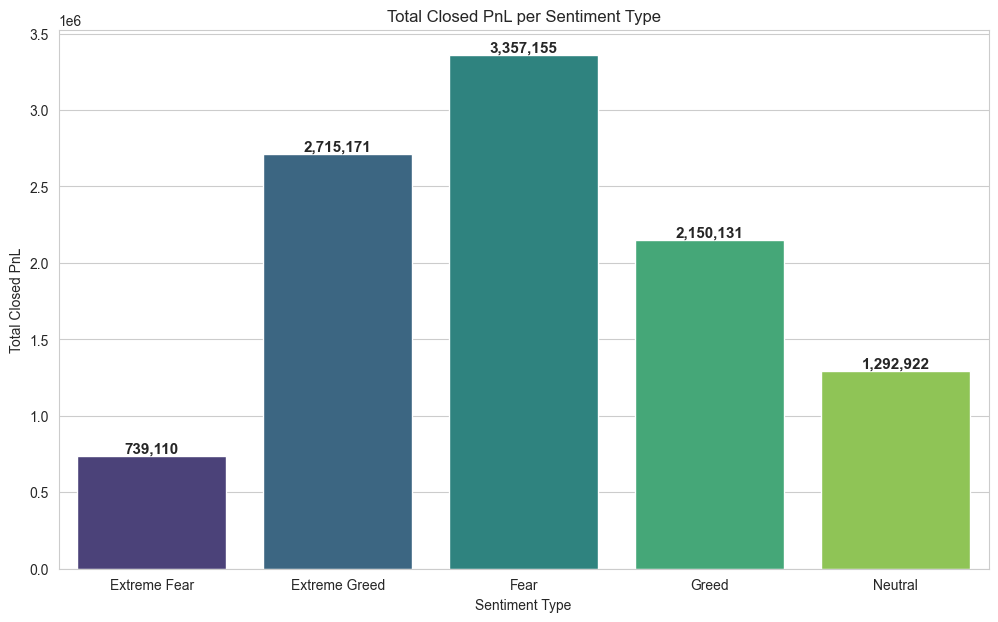

In [10]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
    
# Bar plot for Total Closed PnL per Sentiment Type
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=total_pnl_per_sentiment, 
    x='Sentiment', 
    y='Total Closed PnL', 
    hue='Sentiment', 
    dodge=False,      
    palette='viridis'
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )


plt.title('Total Closed PnL per Sentiment Type')
plt.ylabel('Total Closed PnL')  
plt.xlabel('Sentiment Type')
plt.show()

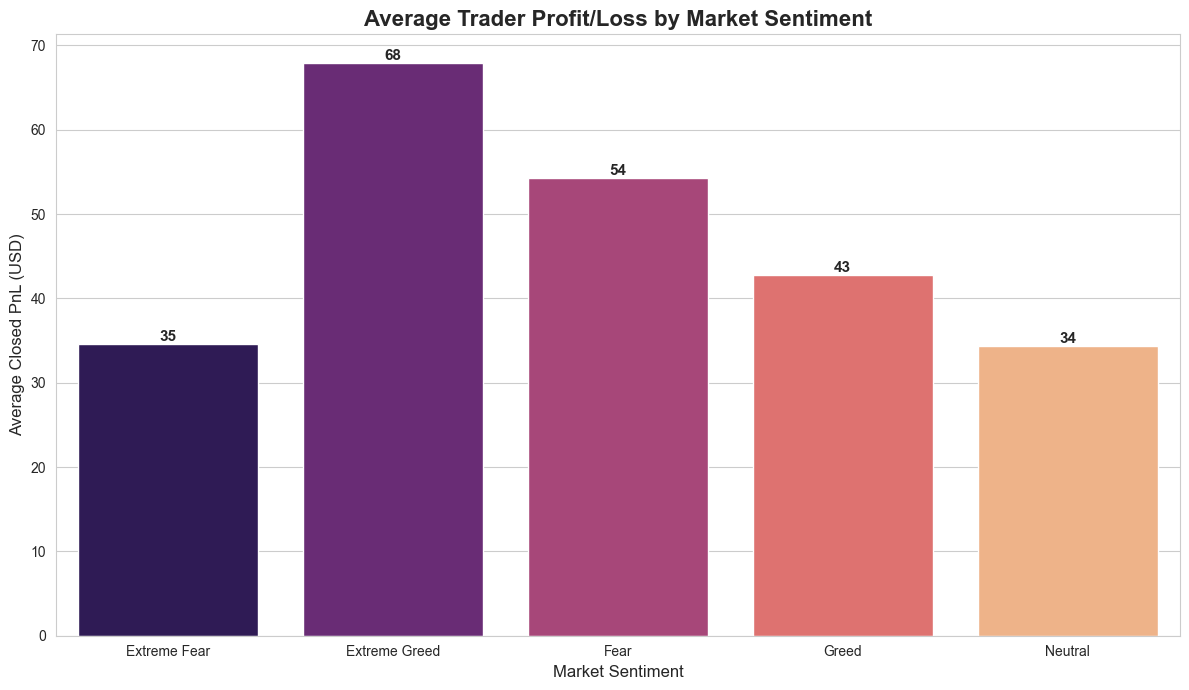

In [11]:
# Bar plot for Average Closed PnL per Sentiment Type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

ax = sns.barplot(
    data=total_pnl_per_sentiment,
    x='Sentiment',
    y='Average Closed PnL',
    palette='magma',
    hue='Sentiment',
)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title("Average Trader Profit/Loss by Market Sentiment",
          fontsize=16, fontweight='bold')
plt.xlabel("Market Sentiment", fontsize=12)
plt.ylabel("Average Closed PnL (USD)", fontsize=12)
plt.tight_layout()
plt.show()


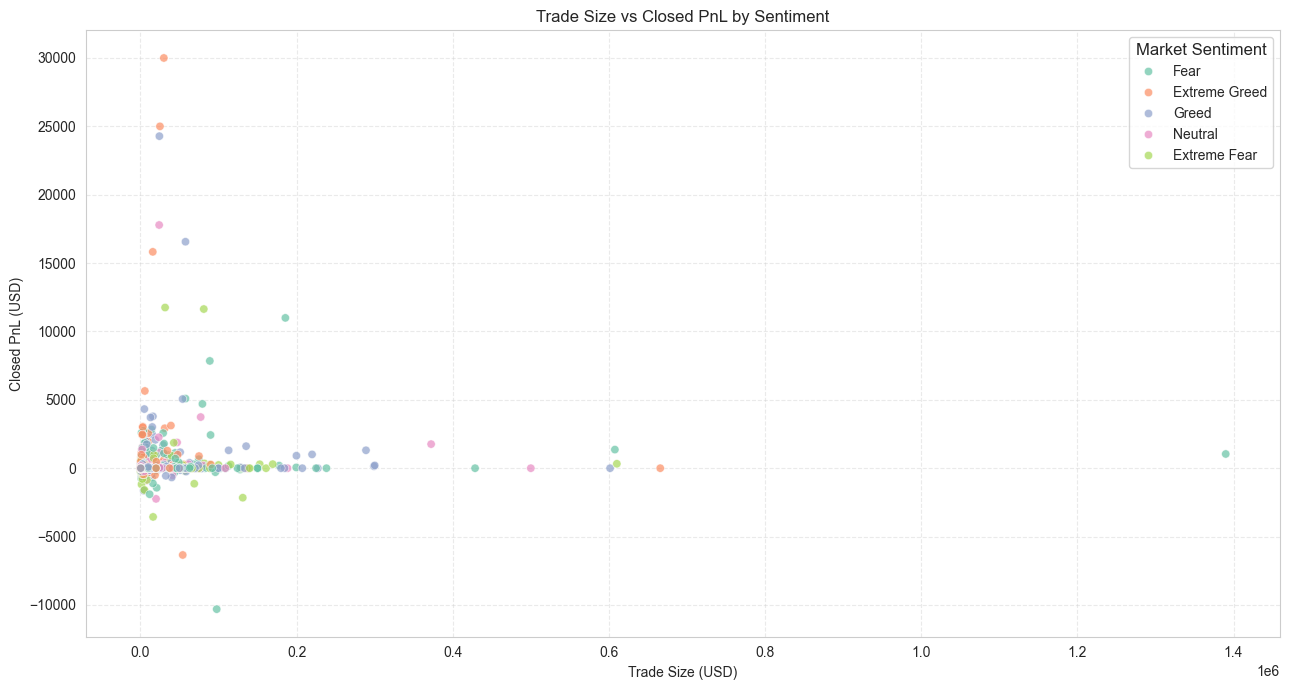

In [61]:
# scatter: trade size vs closed pnl colored by sentiment
plt.figure(figsize=(13,7))
sns.scatterplot(
    data=merged_data.sample(8000),  # Sample for better visualization
    x='Size USD', 
    y='Closed PnL', 
    hue='classification', 
    palette='Set2',
    alpha=0.7,
)

plt.title('Trade Size vs Closed PnL by Sentiment')
plt.xlabel('Trade Size (USD)')
plt.ylabel('Closed PnL (USD)')
plt.legend(title='Market Sentiment', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

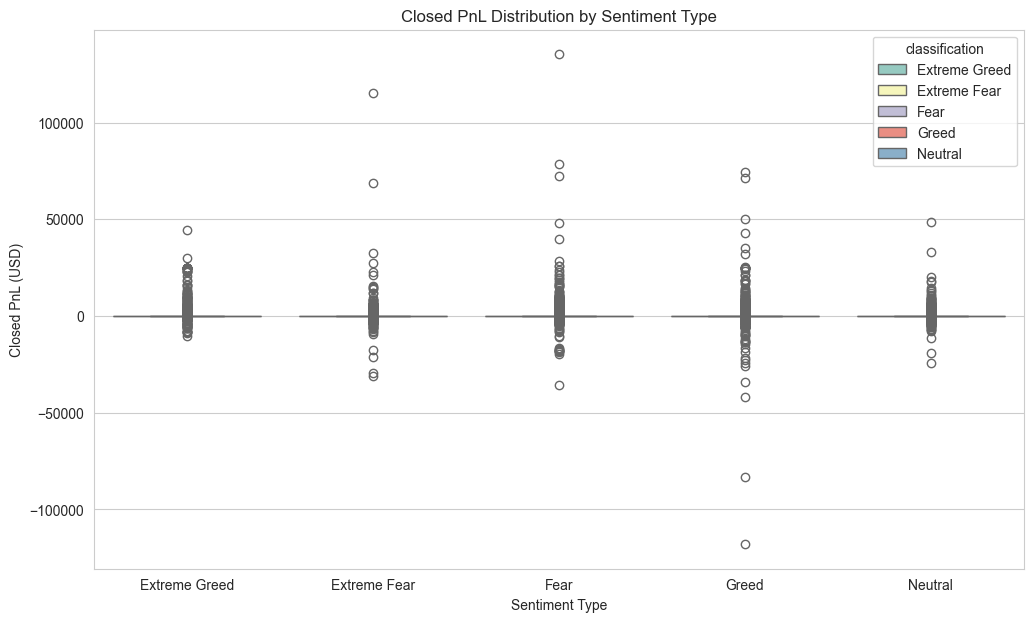

In [ ]:
# Profit distribution per sentiment type
plt.figure(figsize=(12,7))
sns.boxplot(
    data=merged_data, 
    x='classification', 
    y='Closed PnL', 
    palette='Set3',
    hue='classification'
)
plt.title('Closed PnL Distribution by Sentiment Type')
plt.xlabel('Sentiment Type')
plt.ylabel('Closed PnL (USD)') 
plt.show()

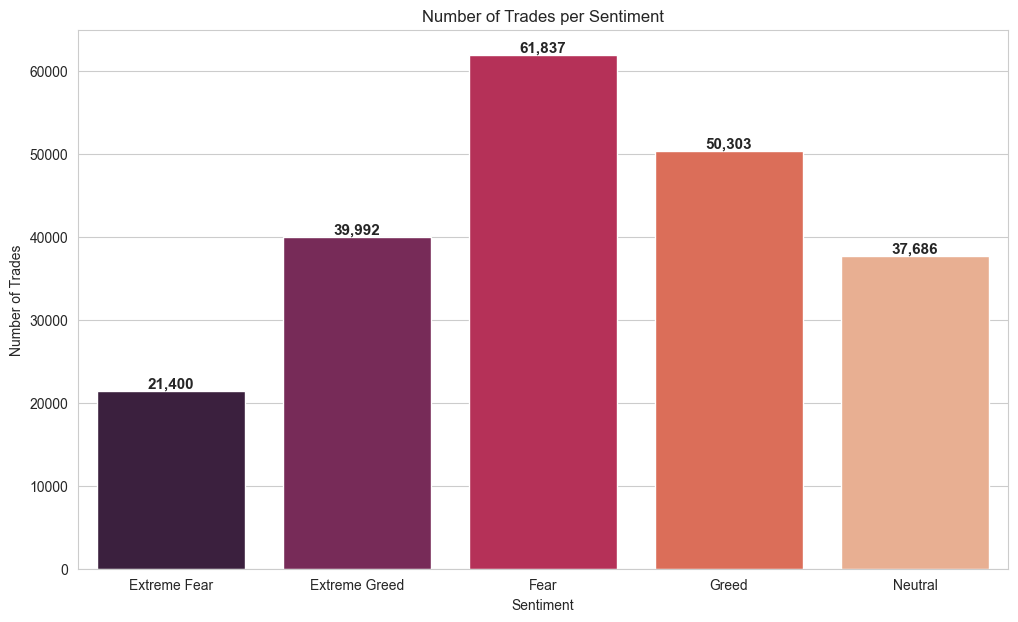

In [76]:
# Trade count per sentiment type
plt.figure(figsize=(12,7))
sns.set_style("whitegrid")


trade_count = merged_data.groupby('classification')['Account'].count().reset_index()
ax = sns.barplot(data=trade_count, x='classification', y='Account', palette='rocket', hue='classification')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.0f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Number of Trades per Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Number of Trades')
plt.show()


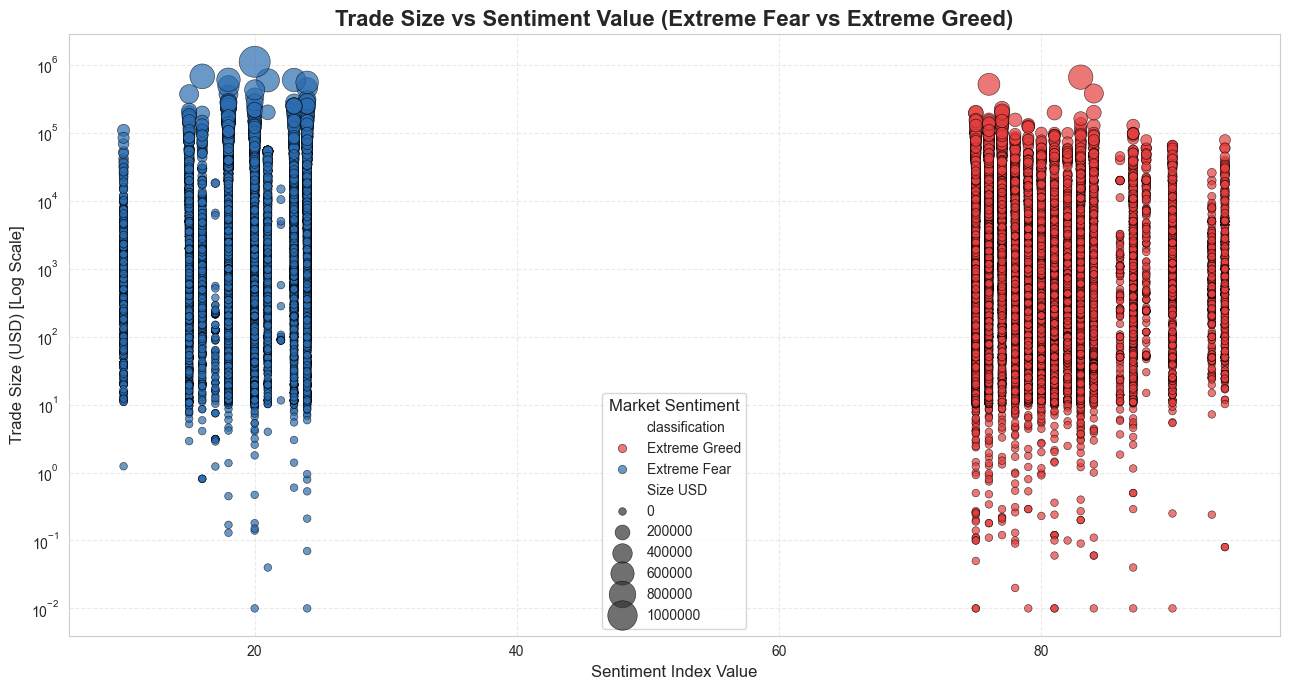

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only extreme sentiments
extreme_sentiments = merged_data[
    merged_data['classification'].isin(['Extreme Fear', 'Extreme Greed'])
]

plt.figure(figsize=(13,7))
sns.set_style("whitegrid")

# Scatter (bubble) plot
sns.scatterplot(
    data=extreme_sentiments,
    x='value',
    y='Size USD',
    hue='classification',
    size='Size USD',     
    sizes=(30, 500),
    palette={'Extreme Fear':'#2b6cb0', 'Extreme Greed':'#e53e3e'},
    alpha=0.7,
    edgecolor='black'
)

# Log scale for better visibility
plt.yscale('log')

# Titles & labels
plt.title('Trade Size vs Sentiment Value (Extreme Fear vs Extreme Greed)',
          fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Index Value', fontsize=12)
plt.ylabel('Trade Size (USD) [Log Scale]', fontsize=12)

plt.legend(title='Market Sentiment', title_fontsize=12, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()


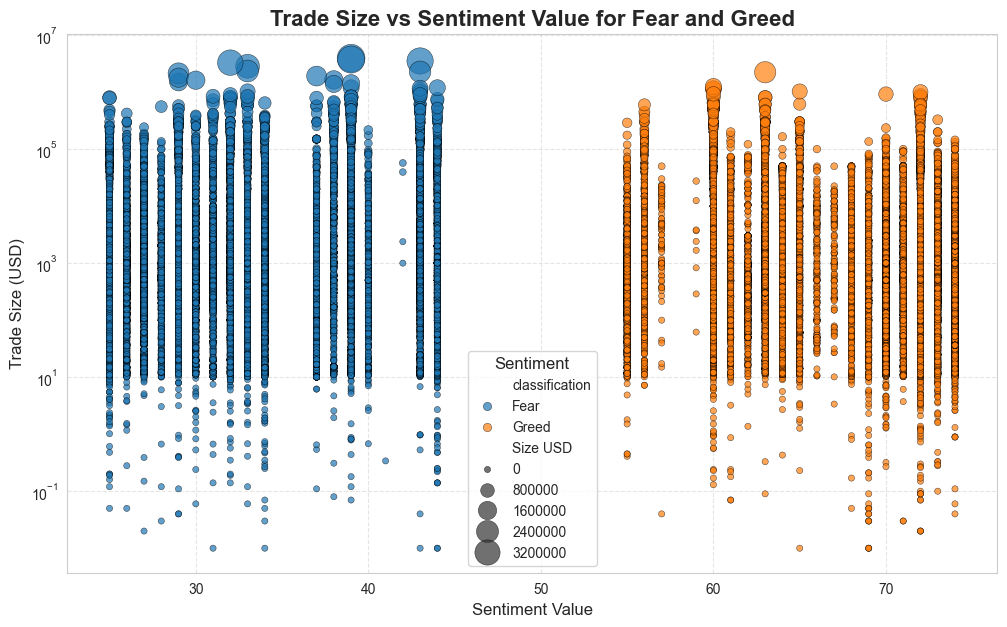

In [ ]:
# Trade size vs sentiment value for Fear and Greed sentiments
import matplotlib.pyplot as plt
import seaborn as sns

# Filter extreme sentiments
feerAndGready = merged_data[merged_data['classification'].isin(['Fear', 'Greed'])]

plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

# Scatter plot with size proportional to trade size
sns.scatterplot(
    data=feerAndGready,
    x='value',
    y='Size USD',
    hue='classification',
    size='Size USD',       
    sizes=(20, 400),      
    palette={'Fear':'#1f77b4', 'Greed':'#ff7f0e'},
    alpha=0.7,
    edgecolor='black'
)

# Titles and labels
plt.title('Trade Size vs Sentiment Value for Fear and Greed', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment Value', fontsize=12)
plt.ylabel('Trade Size (USD)', fontsize=12)
plt.yscale('log') 
plt.legend(title='Sentiment', fontsize=10, title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


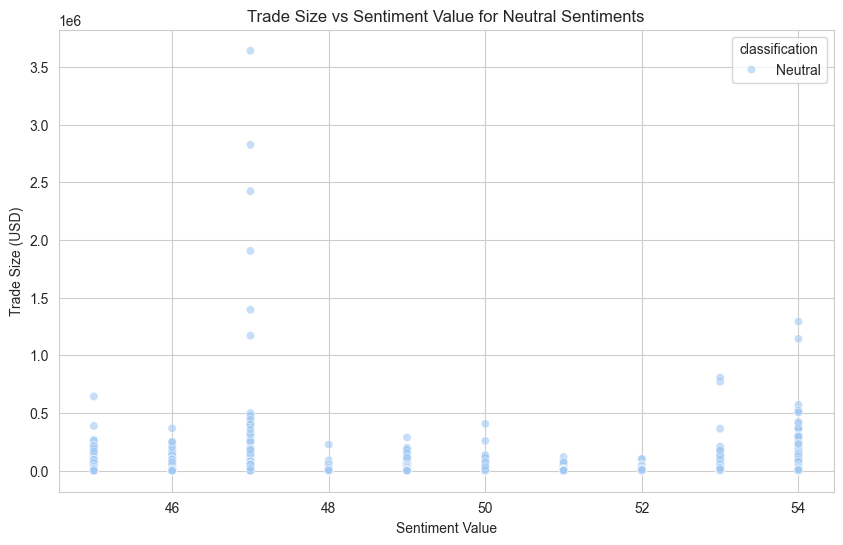

In [73]:
# Trade size vs sentiment value for Neutral sentiments
neutral_sentiments = merged_data[merged_data['classification'].isin(['Neutral'])]
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=neutral_sentiments, 
    x='value', 
    y='Size USD', 
    hue='classification', 
    palette='pastel',
    alpha=0.6
)
plt.title('Trade Size vs Sentiment Value for Neutral Sentiments')
plt.xlabel('Sentiment Value')
plt.ylabel('Trade Size (USD)')
plt.show()

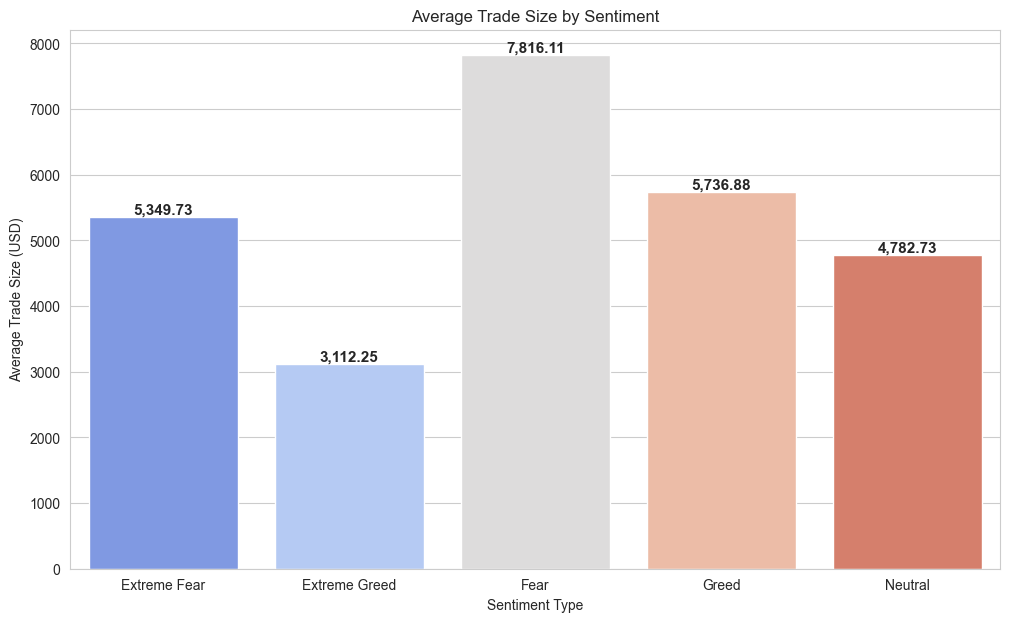

In [78]:
agg_size = merged_data.groupby('classification')['Size USD'].mean().reset_index()

plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")

ax = sns.barplot(data=agg_size, x='classification', y='Size USD', palette='coolwarm', hue='classification')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f'{height:,.2f}',
        (p.get_x() + p.get_width() / 2., height),
        ha='center',
        va='bottom',
        fontsize=11,
        fontweight='bold'
    )

plt.title('Average Trade Size by Sentiment')
plt.ylabel('Average Trade Size (USD)')
plt.xlabel('Sentiment Type')
plt.show()


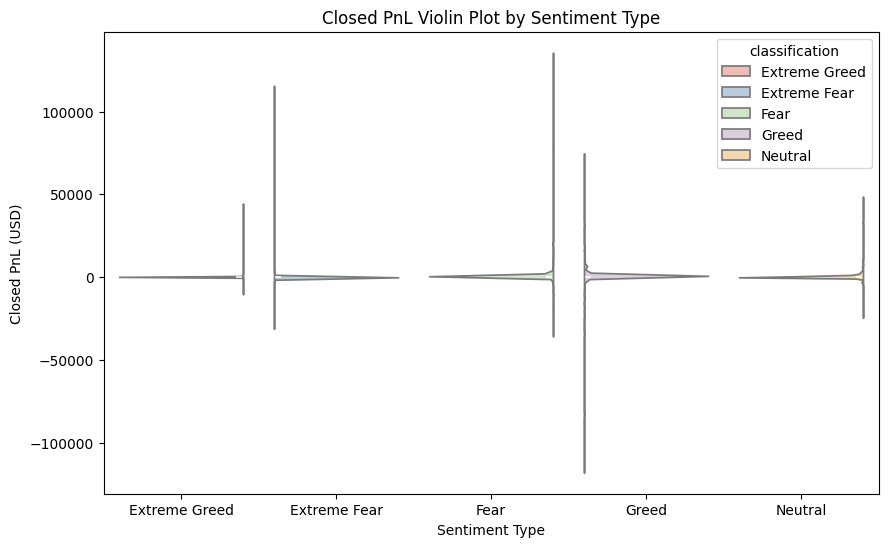

In [15]:
# Profitability Distribution by Sentiment Type
plt.figure(figsize=(10,6))
sns.violinplot(
    data=merged_data, 
    x='classification', 
    y='Closed PnL', 
    palette='Pastel1',
    hue='classification',
    split=True
)
plt.title('Closed PnL Violin Plot by Sentiment Type')
plt.xlabel('Sentiment Type')
plt.ylabel('Closed PnL (USD)')
plt.show()


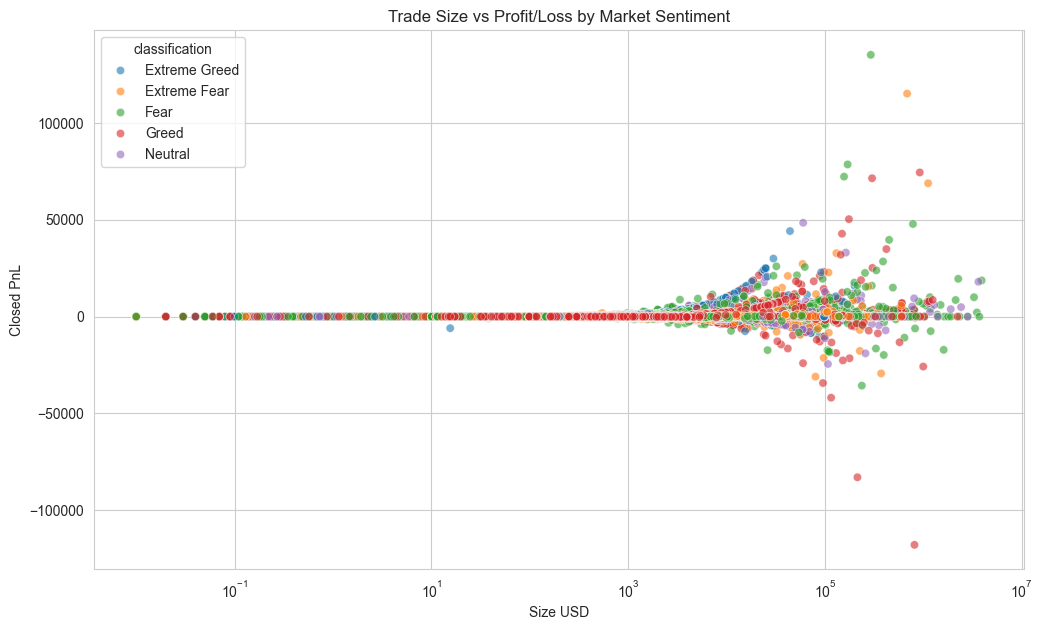

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.scatterplot(
    data=merged_data,
    x='Size USD',
    y='Closed PnL',
    hue='classification',
    alpha=0.6
)
plt.xscale('log')
plt.title("Trade Size vs Profit/Loss by Market Sentiment")
plt.show()


In [31]:
merged = merged_data.to_csv("merged_trader_sentiment.csv", index=False)